In [47]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import scipy.stats as stats


# visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


#clustering
from sklearn.cluster import KMeans,DBSCAN
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics.cluster import silhouette_score

#categorical variables encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [30]:
train = pd.read_csv("train.csv") #full set of train dataset in Kaggle

In [3]:
train.head(10)

id cat1 cat2 cat3 cat4 cat5 cat6 cat7 cat8 cat9    ...        cont6  \
0   1    A    B    A    B    A    A    A    A    B    ...     0.718367   
1   2    A    B    A    A    A    A    A    A    B    ...     0.438917   
2   5    A    B    A    A    B    A    A    A    B    ...     0.289648   
3  10    B    B    A    B    A    A    A    A    B    ...     0.440945   
4  11    A    B    A    B    A    A    A    A    B    ...     0.178193   
5  13    A    B    A    A    A    A    A    A    B    ...     0.364464   
6  14    A    A    A    A    B    A    A    A    A    ...     0.381515   
7  20    A    B    A    B    A    A    A    A    B    ...     0.867021   
8  23    A    B    B    B    B    A    A    A    B    ...     0.628534   
9  24    A    B    A    A    B    B    A    A    B    ...     0.713343   

      cont7    cont8    cont9   cont10    cont11    cont12    cont13  \
0  0.335060  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493   
1  0.436585  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431   
2  0.315545  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709   
3  0.391128  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077   
4  0.247408  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011   
5  0.401162  0.26847  0.46226  0.50556  0.366788  0.359249  0.345247   
6  0.363768  0.24564  0.40455  0.47225  0.334828  0.352251  0.342239   
7  0.583389  0.90267  0.84847  0.80218  0.644013  0.785706  0.859764   
8  0.384099  0.61229  0.38249  0.51111  0.682315  0.669033  0.756454   
9  0.469223  0.30260  0.67135  0.83510  0.863052  0.879347  0.822493   

     cont14      loss  
0  0.714843   2213.18  
1  0.304496   1283.60  
2  0.774425   3005.09  
3  0.602642    939.85  
4  0.432606   2763.85  
5  0.726792   5142.87  
6  0.382931   1132.22  
7  0.242416   3585.75  
8  0.361191  10280.20  
9  0.294523   6184.59  

[10 rows x 132 columns]

In [5]:
print train.size #checking dimensions of dataset
print train.shape
train.describe()

24857976
(188318, 132)


id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.281143       0.336105       0.350175   
50%         0.452887       0.422268       0.440945       0.438285   
75%         0.652072       0.643315       0.655021       0.591045   
max         0.954297       0.983674       0.997162       1.000000   

               cont8          cont9         cont10         cont11  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.486437       0.485506       0.498066       0.493511   
std         0.199370       0.181660       0.185877       0.209737   
min         0.236880       0.000080       0.000000       0.035321   
25%         0.312800       0.358970       0.364580       0.310961   
50%         0.441060       0.441450       0.461190       0.457203   
75%         0.623580       0.566820       0.614590       0.678924   
max         0.980200       0.995400       0.994980       0.998742   

              cont12         cont13         cont14           loss  
count  188318.000000  188318.000000  188318.000000  188318.000000  
mean        0.493150       0.493138       0.495717    3037.337686  
std         0.209427       0.212777       0.222488    2904.086186  
min         0.036232       0.000228       0.179722       0.670000  
25%         0.311661       0.315758       0.294610    1204.460000  
50%         0.462286       0.363547       0.407403    2115.570000  
75%         0.675759       0.689974       0.724623    3864.045000  
max         0.998484       0.988494       0.844848  121012.250000

In [ ]:
* 15 continuous features
* response variable = loss

In [8]:
print "total Categorical features:", 132-15 #total categorical
print "percent num:", float(15.00/132) # percentage of continuous features

total Categorical features: 117
percent num: 0.113636363636


In [6]:
train["loss"].describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

In [18]:
train.describe(include = ['object']) #categorical variable description with unique, top

cat1    cat2    cat3    cat4    cat5    cat6    cat7    cat8  \
count   188318  188318  188318  188318  188318  188318  188318  188318   
unique       2       2       2       2       2       2       2       2   
top          A       A       A       A       A       A       A       A   
freq    141550  106721  177993  128395  123737  131693  183744  177274   

          cat9   cat10   ...    cat107  cat108  cat109  cat110  cat111  \
count   188318  188318   ...    188318  188318  188318  188318  188318   
unique       2       2   ...        20      11      84     131      16   
top          A       A   ...         F       B      BI      CL       A   
freq    113122  160213   ...     47310   65512  152918   25305  128395   

        cat112  cat113  cat114  cat115  cat116  
count   188318  188318  188318  188318  188318  
unique      51      61      19      23     326  
top          E      BM       A       K      HK  
freq     25148   26191  131693   43866   21061  

[4 rows x 116 columns]

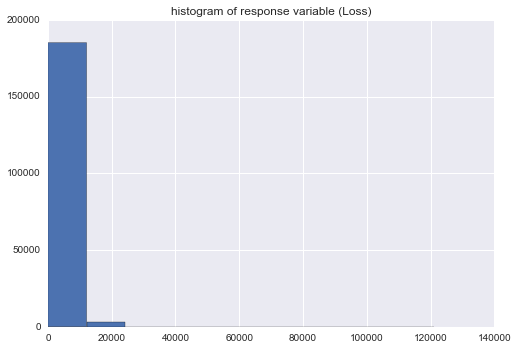

In [17]:
plt.hist(train.loss)
plt.title("histogram of response variable (Loss)")
plt.show()
# right skewed; not from normal distribution

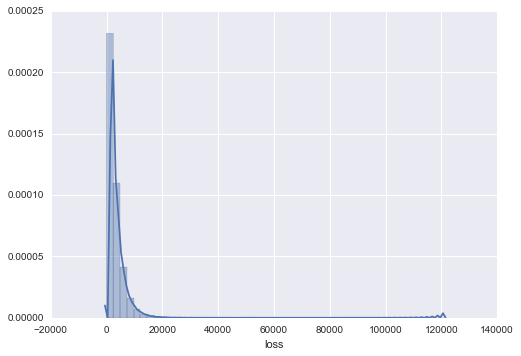

In [21]:
sns.distplot(train["loss"]) #not drawn from normal distribution

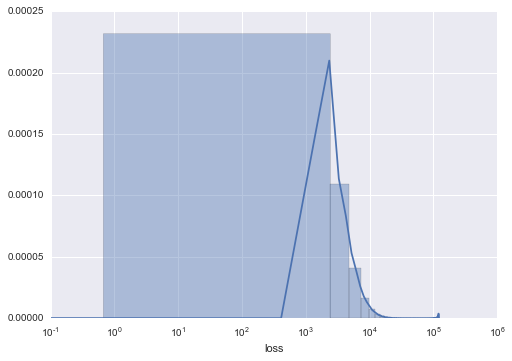

In [25]:
sns.distplot(train["loss"])
plt.xscale('log') #normalized distribution

In [ ]:
# splitting cont & cat after eyeballing
col = list(train.columns.values) #list of columns/features
catCol = col[1:117] #subset of category features
contCol = col[118:132] #subset of continuous features
contCol

In [29]:
# find and separate continuous and categorical features
contCol = []
catCol = []

for i in train.columns:
    if train[i].dtype == 'float':
        contCol.append(i)
    elif train[i].dtype == 'object':
        catCol.append(i)

In [31]:
contCol

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'loss']

In [9]:
col = list(train.columns.values) #list of columns/features
catCol = col[1:117] #subset of category features
contCol = col[118:132] #subset of continuous features
contCol

['cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14',
 'loss']

In [11]:
nuniqCat = pd.DataFrame(train[catCol].apply(lambda x: np.unique(x).size)) #getting unique levels for each categorical feature

In [12]:
nuniqCat

0
cat1      2
cat2      2
cat3      2
cat4      2
cat5      2
cat6      2
cat7      2
cat8      2
cat9      2
cat10     2
cat11     2
cat12     2
cat13     2
cat14     2
cat15     2
cat16     2
cat17     2
cat18     2
cat19     2
cat20     2
cat21     2
cat22     2
cat23     2
cat24     2
cat25     2
cat26     2
cat27     2
cat28     2
cat29     2
cat30     2
...     ...
cat87     4
cat88     4
cat89     8
cat90     7
cat91     8
cat92     7
cat93     5
cat94     7
cat95     5
cat96     8
cat97     7
cat98     5
cat99    16
cat100   15
cat101   19
cat102    9
cat103   13
cat104   17
cat105   20
cat106   17
cat107   20
cat108   11
cat109   84
cat110  131
cat111   16
cat112   51
cat113   61
cat114   19
cat115   23
cat116  326

[116 rows x 1 columns]

In [38]:
# normalize response variable
train["lossLog"] = np.log(train.loss) 
print train["lossLog"].head(5), train["loss"].head(5)
print train.columns.values

0    7.702186
1    7.157424
2    8.008063
3    6.845720
4    7.924380
Name: lossLog, dtype: float64 0    2213.18
1    1283.60
2    3005.09
3     939.85
4    2763.85
Name: loss, dtype: float64
['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100'

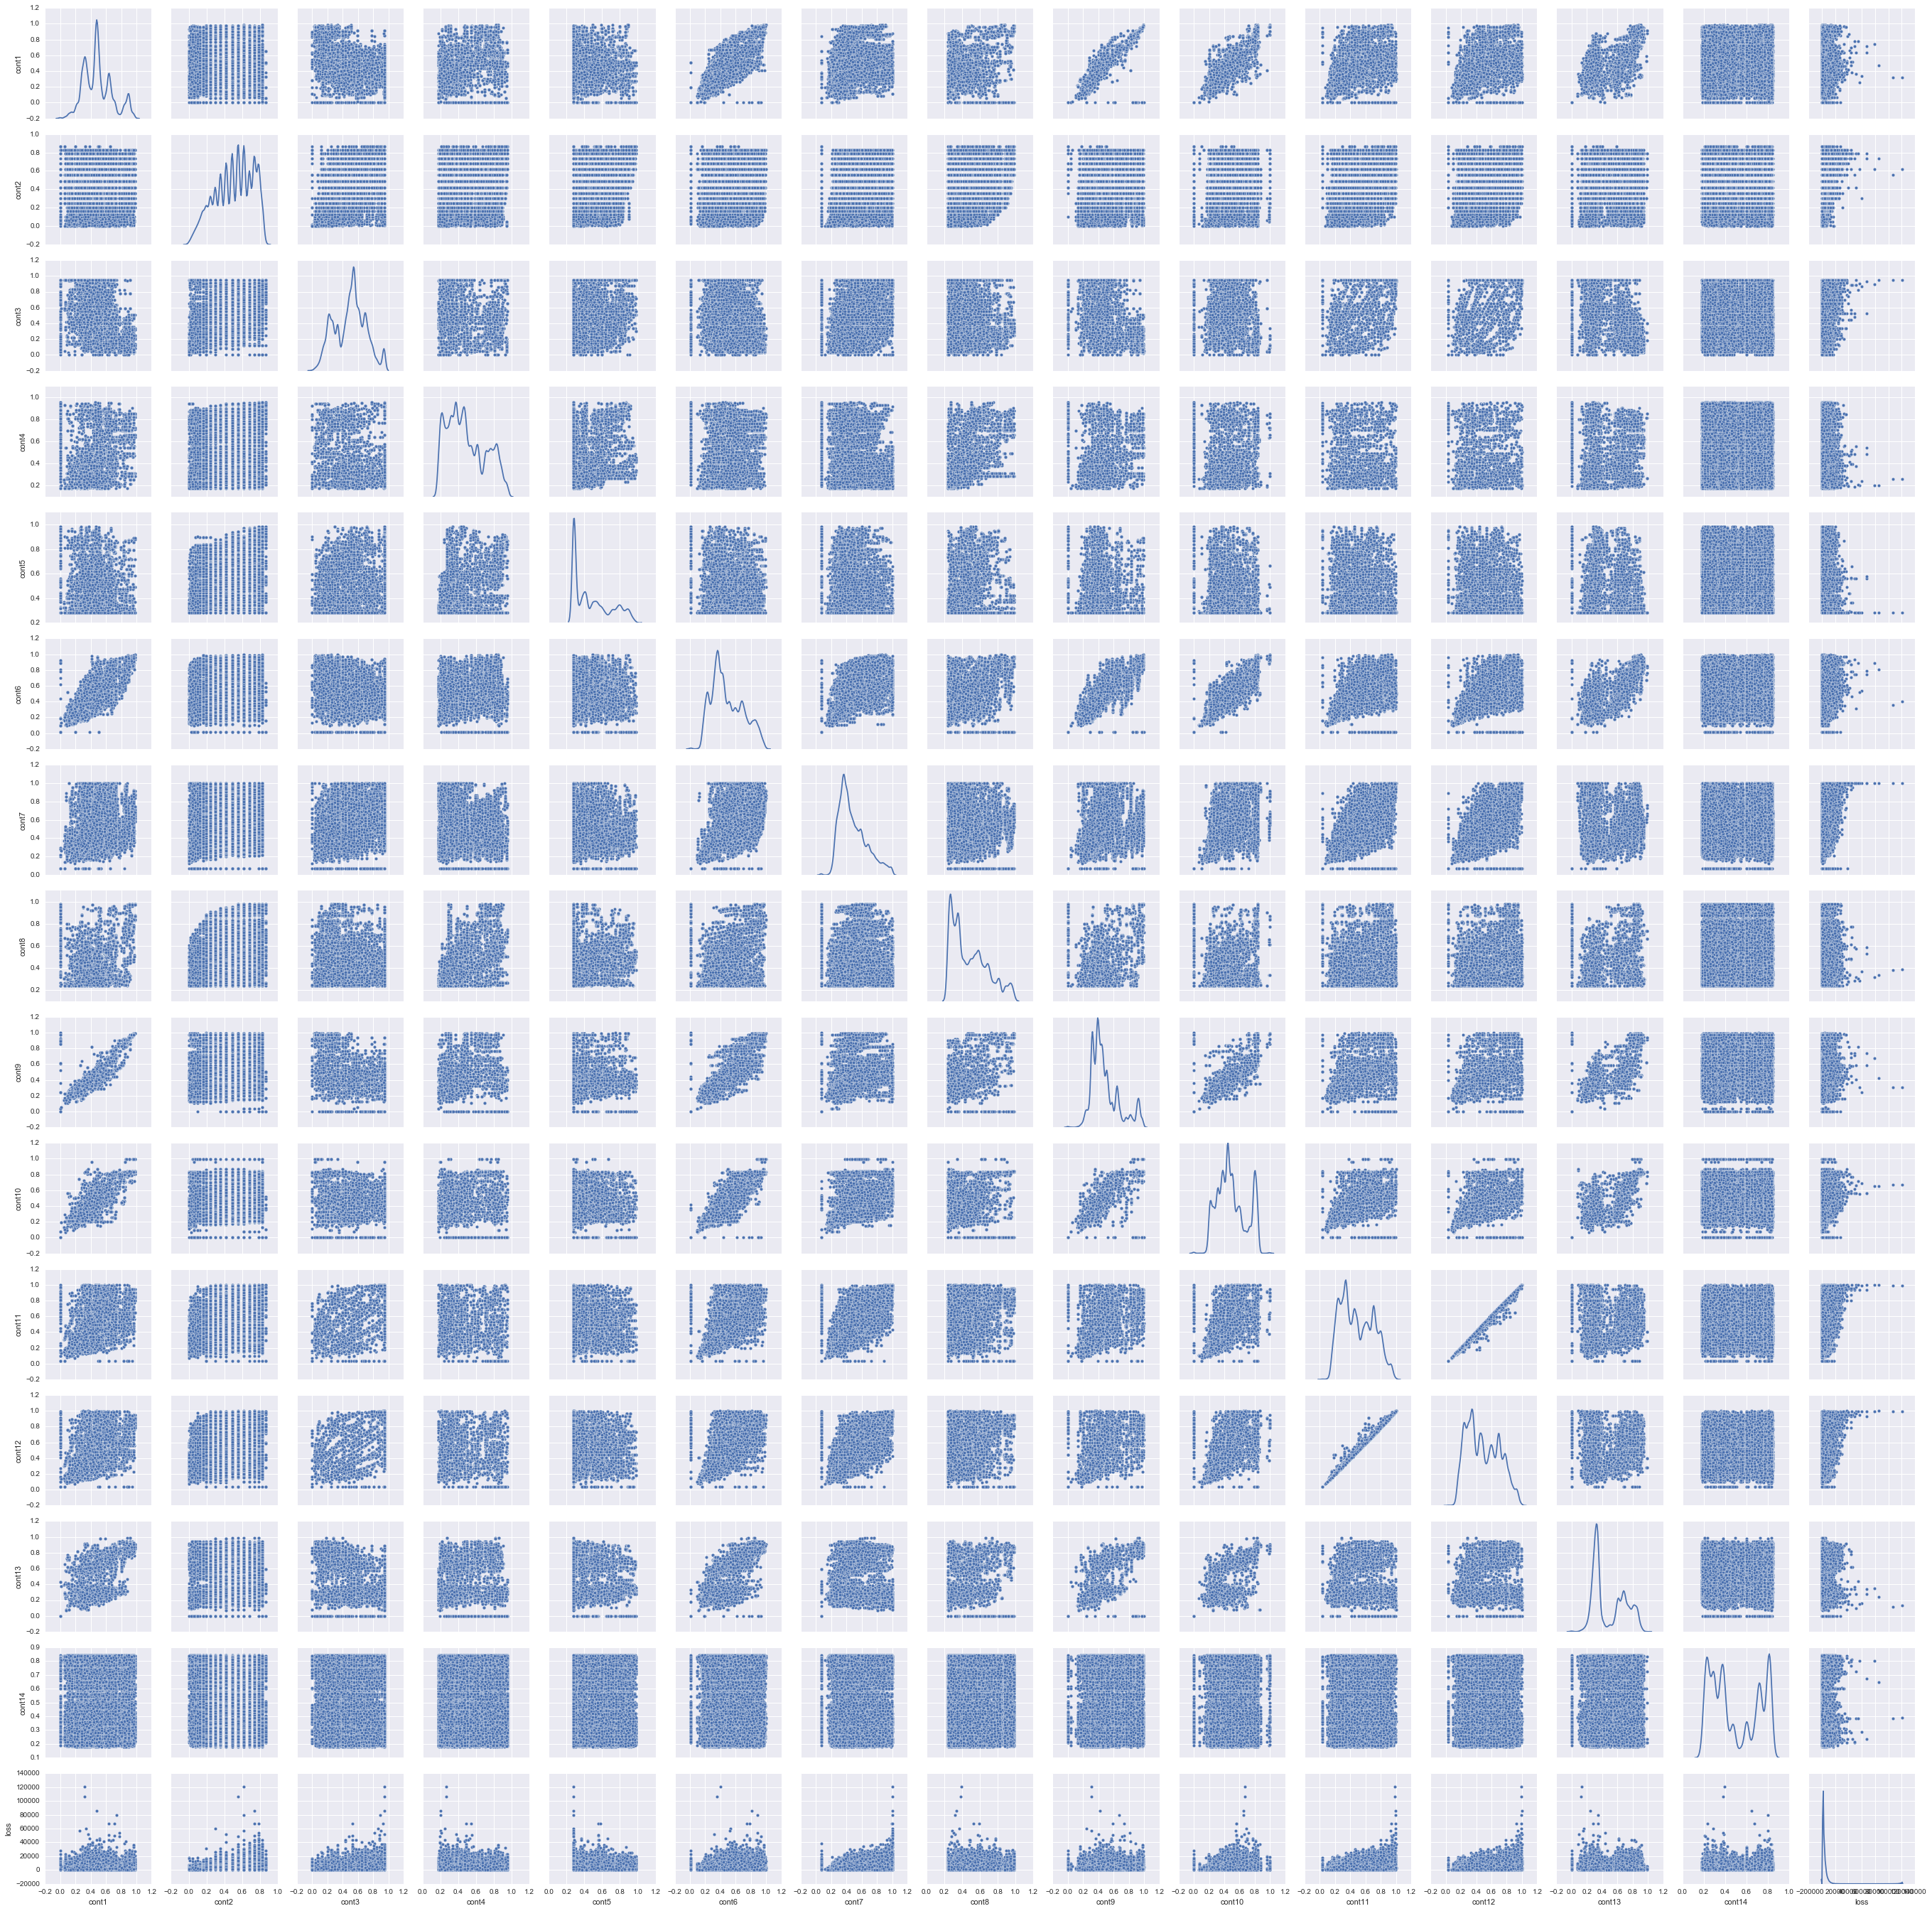

In [39]:
sns.pairplot(train[contCol], kind = "scatter", diag_kind = "kde")

# Feature Transformation

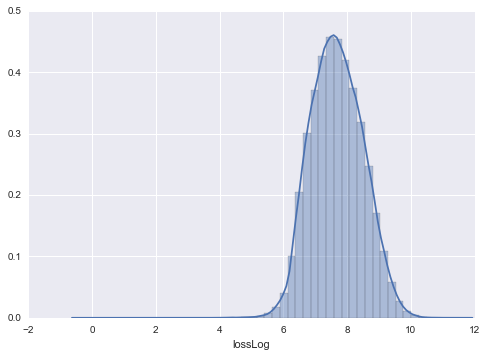

In [40]:
sns.distplot(train["lossLog"])

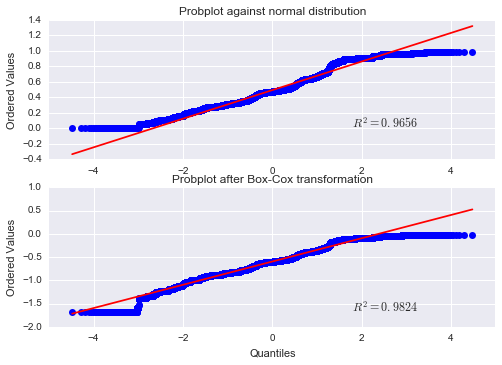

In [43]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(train.cont1, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

# applying boxcox to cont1
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(train.cont1)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()

source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

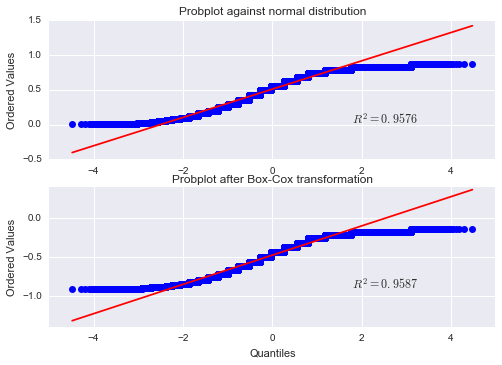

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = stats.loggamma.rvs(5, size=500) + 5
prob = stats.probplot(train.cont2, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

# applying boxcox to cont2
ax2 = fig.add_subplot(212)
xt, _ = stats.boxcox(train.cont2)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')



plt.show()

In [45]:
def examine_transform(original, transformed):
    plt.figure(figsize=(15,10))
    gs = gridspec.GridSpec(3,2, width_ratios=(1,2))
    
    ax = plt.subplot(gs[0])
    sns.distplot(original, bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of orignal feature')
    
    ax = plt.subplot(gs[1])
    prob = stats.probplot(original, dist = stats.norm, plot = ax)
    ax.set_xlabel('')
    ax.set_title('Probplot of original feature')
    
    ax = plt.subplot(gs[2])
    sns.distplot(transformed, bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of transformed feature')
    
    ax = plt.subplot(gs[3])
    prob = stats.probplot(transformed, dist = stats.norm, plot = ax)
    ax.set_xlabel('')
    ax.set_title('Probplot of transformed feature')
    
    # apply boxcox transformation
    xt, _ = stats.boxcox(original)
    ax = plt.subplot(gs[4])
    sns.distplot(xt, bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of boxcox transformed feature')
    
    ax = plt.subplot(gs[5])
    prob = stats.probplot(xt, dist = stats.norm, plot = ax)
    ax.set_xlabel('')
    ax.set_title('Probplot of boxcox transformed feature')
    
    
    plt.show()

source: https://www.kaggle.com/snmateen/allstate-claims-severity/simple-eda-feature-transformations/comments

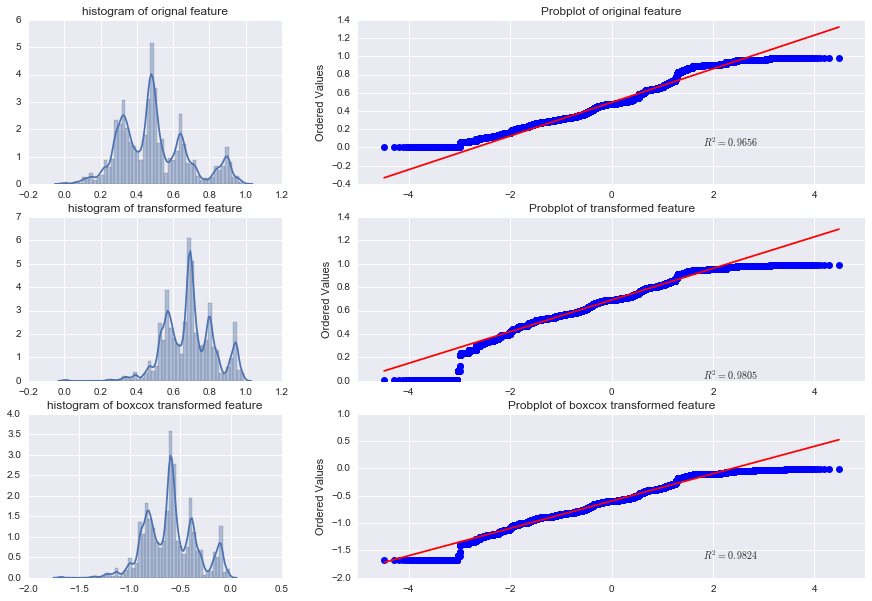

In [48]:
examine_transform(train.cont1, np.power(train.cont1,0.5))

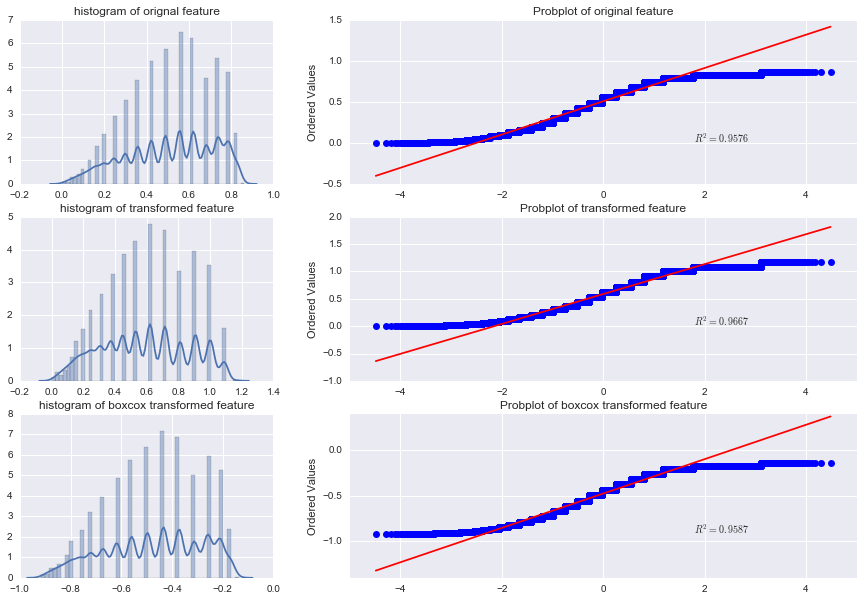

In [49]:
examine_transform(train.cont2, np.tan(train.cont2))

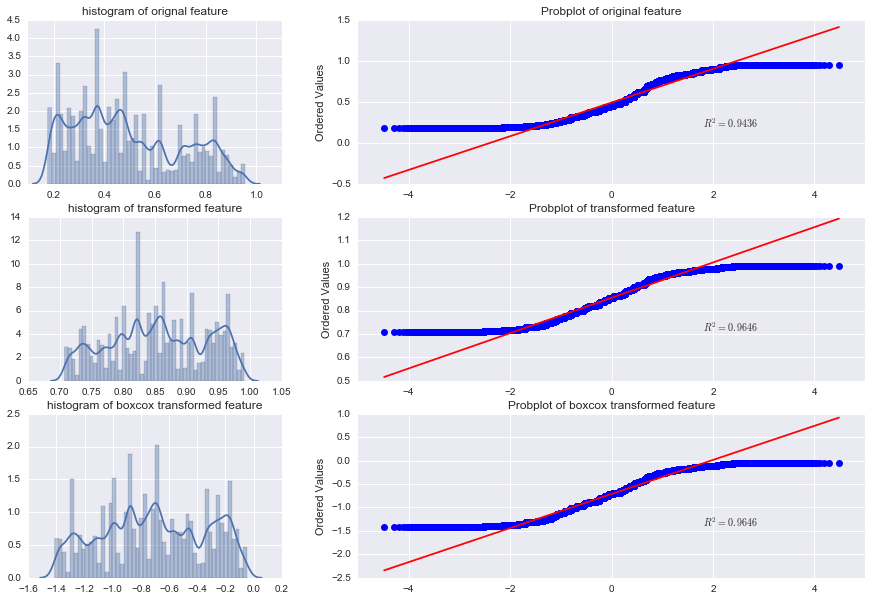

In [50]:
examine_transform(train.cont4, np.power(train.cont4,0.2))

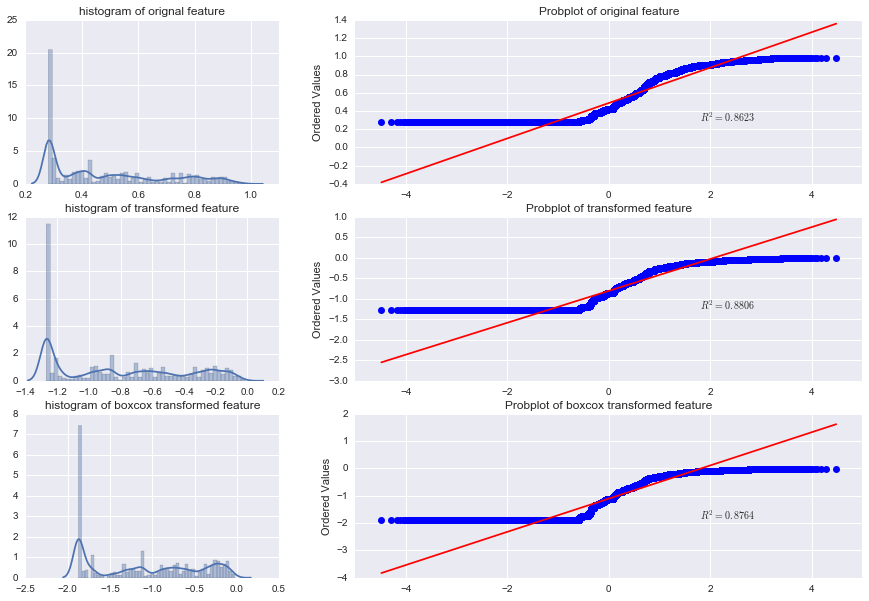

In [51]:
examine_transform(train.cont5, np.log(train.cont5))

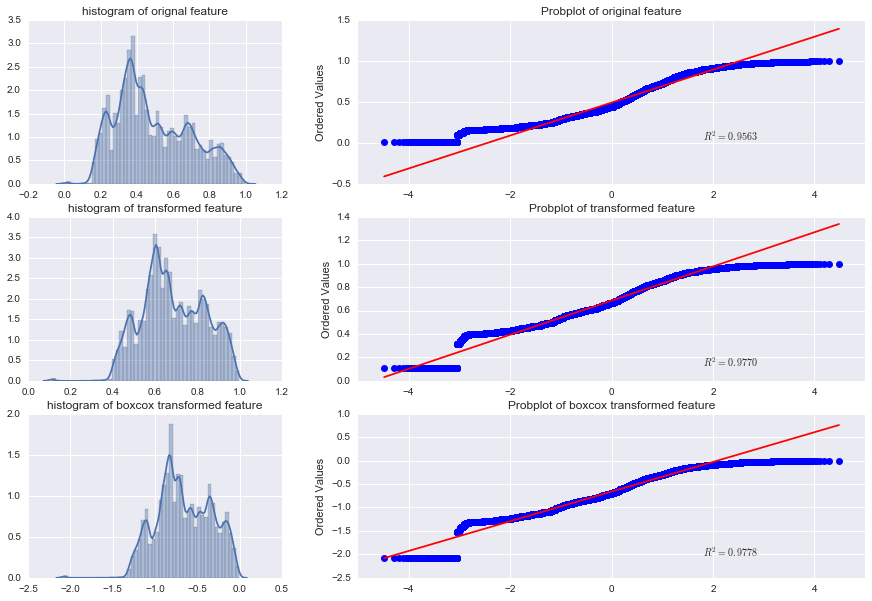

In [52]:
examine_transform(train.cont6, np.power(train.cont6,0.5))

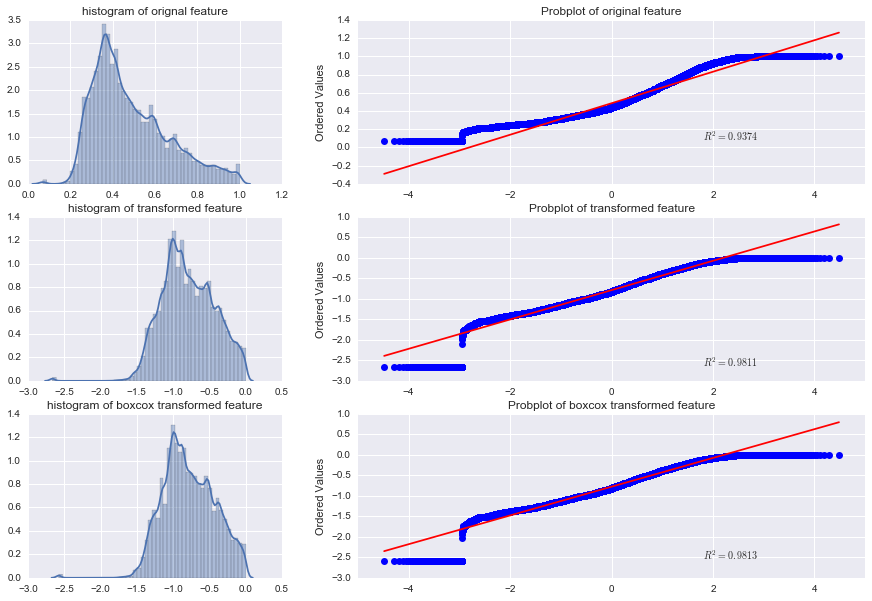

In [53]:
examine_transform(train.cont7, np.log(train.cont7))

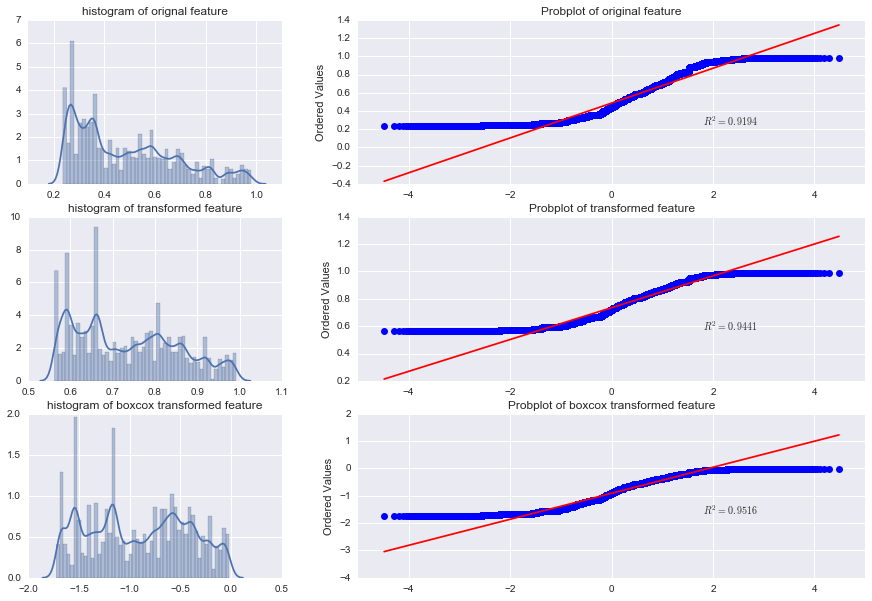

In [54]:
examine_transform(train.cont8, np.power(train.cont8,0.4))

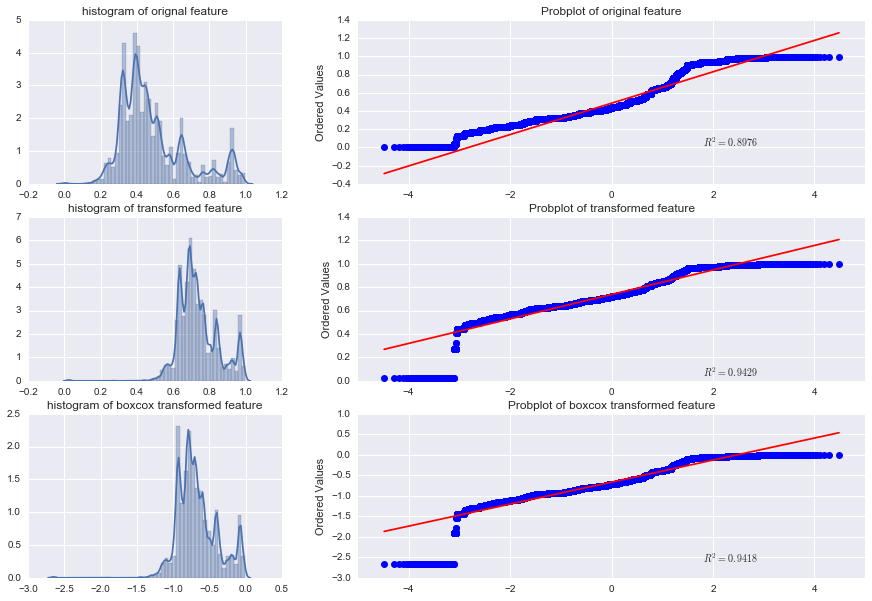

In [55]:
examine_transform(train.cont9, np.power(train.cont9,0.4))

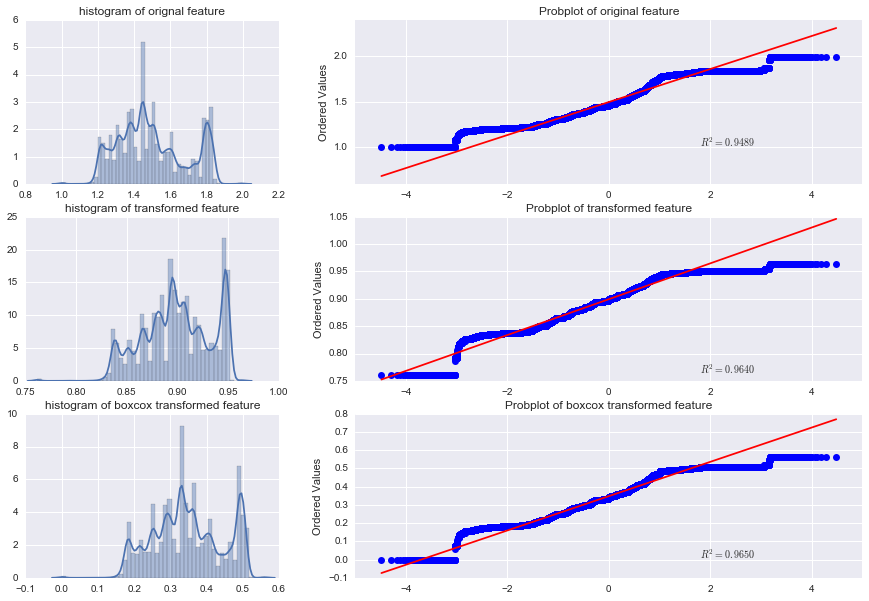

In [56]:
examine_transform(train.cont10+1, np.tanh(train.cont10+1))

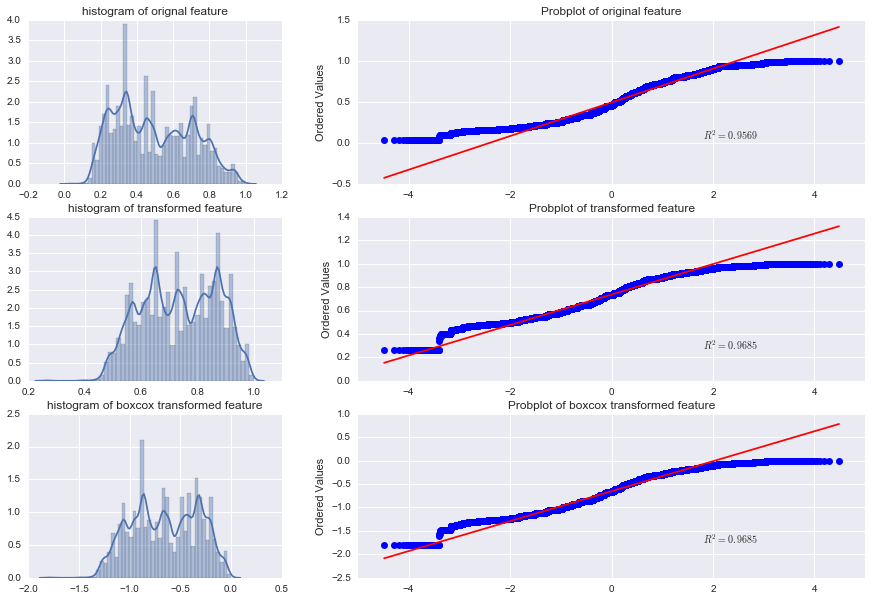

In [58]:
examine_transform(train.cont11, np.power(train.cont11,0.4))

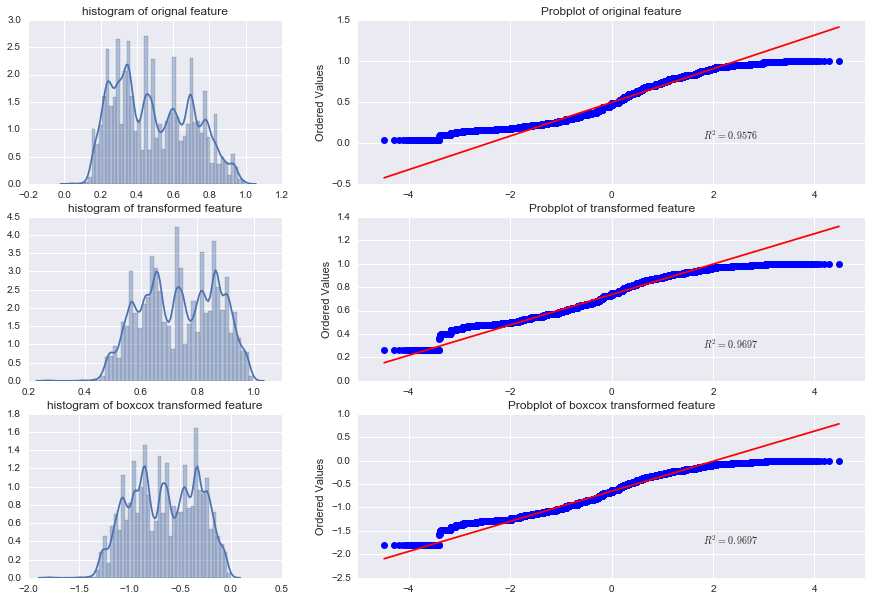

In [59]:
examine_transform(train.cont12, np.power(train.cont12,0.4))

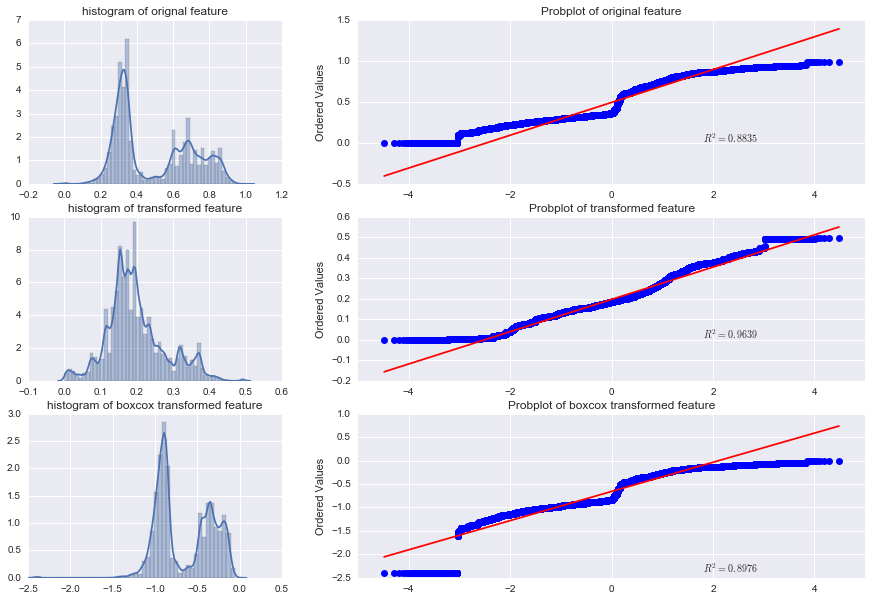

In [60]:
examine_transform(train.cont13, np.abs(train.cont13 - np.mean(train.cont13)))

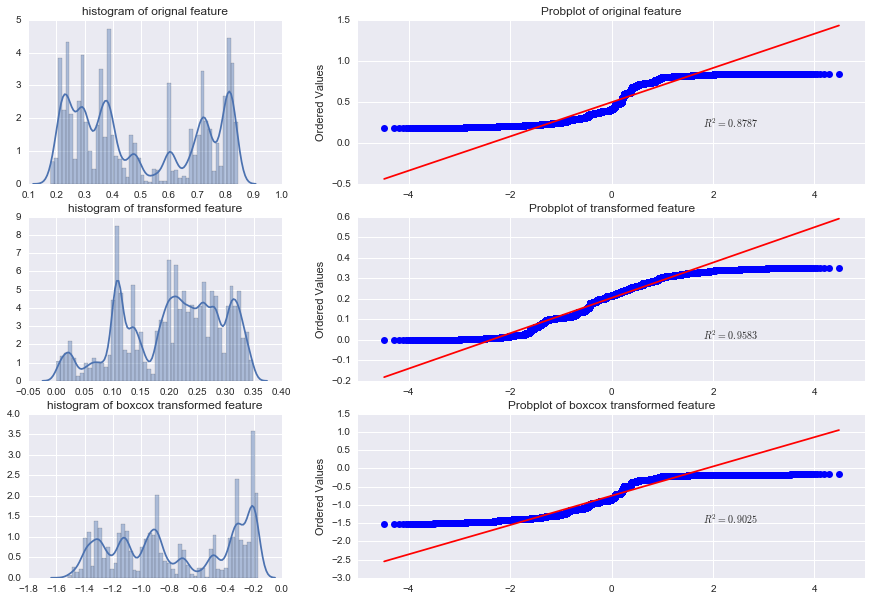

In [61]:
examine_transform(train.cont14, np.abs(train.cont14 - np.mean(train.cont14)))

# Variable Relationships

In [93]:
trainNoID = train.iloc[:,117:133] #subset by removing ID and cat vars
trainNoID

cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0       0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1       0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2       0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3       0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4       0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   
5       0.546670  0.681761  0.634224  0.373816  0.302678  0.364464  0.401162   
6       0.471447  0.737068  0.613660  0.189137  0.295397  0.381515  0.363768   
7       0.826591  0.488789  0.263570  0.623770  0.473767  0.867021  0.583389   
8       0.330514  0.555782  0.440642  0.473202  0.281143  0.628534  0.384099   
9       0.726300  0.358319  0.356819  0.802892  0.310061  0.713343  0.469223   
10      0.496063  0.358319  0.654310  0.284048  0.281143  0.429383  0.877905   
11      0.520698  0.422197  0.634224  0.432728  0.508483  0.314683  0.370419   
12      0.321594  0.555782  0.527991  0.373816  0.302678  0.408772  0.363312   
13      0.351358  0.555782  0.440642  0.833240  0.811271  0.241574  0.255339   
14      0.894333  0.299102  0.094942  0.722125  0.281143  0.894903  0.586433   
15      0.472892  0.681761  0.484196  0.442784  0.281143  0.570733  0.547756   
16      0.424162  0.737068  0.806430  0.259793  0.525831  0.411902  0.593548   
17      0.834747  0.488789  0.246911  0.833240  0.551723  0.688705  0.437192   
18      0.488816  0.422197  0.592681  0.452887  0.281143  0.443265  0.637086   
19      0.391956  0.159990  0.263570  0.432728  0.602545  0.436312  0.544355   
20      0.338258  0.785784  0.654310  0.373816  0.718531  0.441525  0.437192   
21      0.283689  0.488789  0.506105  0.463029  0.534484  0.349885  0.381185   
22      0.125526  0.620805  0.613660  0.236924  0.281143  0.183243  0.253560   
23      0.475784  0.785784  0.592681  0.614134  0.783230  0.373500  0.381883   
24      0.378225  0.785784  0.762059  0.259793  0.543117  0.382070  0.451203   
25      0.573810  0.422197  0.263570  0.229617  0.281143  0.592478  0.496452   
26      0.296829  0.358319  0.654310  0.284048  0.281143  0.435733  0.769905   
27      0.475784  0.620805  0.462347  0.534409  0.889301  0.373500  0.356037   
28      0.645422  0.299102  0.527991  0.327354  0.422268  0.671307  0.464924   
29      0.477231  0.488789  0.246911  0.463029  0.281143  0.557431  0.402942   
...          ...       ...       ...       ...       ...       ...       ...   
188288  0.638758  0.422197  0.506105  0.833240  0.836443  0.482425  0.414750   
188289  0.642763  0.555782  0.549770  0.327354  0.725503  0.690216  0.498919   
188290  0.642763  0.488789  0.549770  0.327354  0.422268  0.688705  0.490407   
188291  0.644094  0.785784  0.745801  0.761209  0.499798  0.808048  0.694312   
188292  0.514906  0.422197  0.246911  0.244390  0.281143  0.484775  0.480521   
188293  0.894333  0.422197  0.174588  0.789639  0.594196  0.850938  0.611159   
188294  0.315300  0.488789  0.549770  0.422727  0.281143  0.197932  0.314927   
188295  0.645422  0.199504  0.336963  0.327354  0.422268  0.651024  0.452181   
188296  0.509110  0.681761  0.571360  0.300956  0.878617  0.625784  0.606340   
188297  0.348719  0.620805  0.844219  0.229617  0.281143  0.448496  0.735978   
188298  0.243238  0.620805  0.419161  0.236924  0.281143  0.415039  0.395131   
188299  0.329232  0.100099  0.187583  0.503820  0.281143  0.563226  0.451570   
188300  0.446969  0.620805  0.711159  0.422727  0.850206  0.835720  0.794598   
188301  0.436958  0.488789  0.819748  0.208655  0.281143  0.425928  0.636286   
188302  0.497513  0.422197  0.397983  0.594598  0.281143  0.349083  0.368005   
188303  0.894333  0.358319  0.263570  0.696873  0.281143  0.806951  0.555567   
188304  0.596331  0.620805  0.692825  0.564742  0.895958  0.437758  0.535749   
188305  0.465671  0.199504  0.527991  0.229617  0.372405  0.674671  0.699628   
188306  0.7

In [84]:
auto_correlations = trainNoID.corr() #continuous vars only
auto_correlations

cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1   1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315  0.367384   
cont2  -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864  0.048187   
cont3  -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278  0.097516   
cont4   0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932 -0.115064   
cont5  -0.025230  0.191427  0.089417  0.163748  1.000000 -0.149810 -0.249344   
cont6   0.758315  0.015864 -0.349278  0.220932 -0.149810  1.000000  0.658918   
cont7   0.367384  0.048187  0.097516 -0.115064 -0.249344  0.658918  1.000000   
cont8   0.361163  0.137468 -0.185432  0.528740  0.009015  0.437437  0.142042   
cont9   0.929912 -0.032729 -0.417054  0.328961 -0.088202  0.797544  0.384343   
cont10  0.808551  0.063526 -0.325562  0.283294 -0.064967  0.883351  0.492621   
cont11  0.596090  0.116824  0.025271  0.120927 -0.151548  0.773745  0.747108   
cont12  0.614225  0.106250  0.006111  0.130453 -0.148217  0.785144  0.742712   
cont13  0.534850  0.023335 -0.418203  0.179342 -0.082915  0.815091  0.288395   
cont14  0.056688 -0.045584 -0.039592  0.017445 -0.021638  0.042178  0.022286   
loss   -0.010237  0.141528  0.111053 -0.035831 -0.011355  0.040967  0.119799   

           cont8     cont9    cont10    cont11    cont12    cont13    cont14  \
cont1   0.361163  0.929912  0.808551  0.596090  0.614225  0.534850  0.056688   
cont2   0.137468 -0.032729  0.063526  0.116824  0.106250  0.023335 -0.045584   
cont3  -0.185432 -0.417054 -0.325562  0.025271  0.006111 -0.418203 -0.039592   
cont4   0.528740  0.328961  0.283294  0.120927  0.130453  0.179342  0.017445   
cont5   0.009015 -0.088202 -0.064967 -0.151548 -0.148217 -0.082915 -0.021638   
cont6   0.437437  0.797544  0.883351  0.773745  0.785144  0.815091  0.042178   
cont7   0.142042  0.384343  0.492621  0.747108  0.742712  0.288395  0.022286   
cont8   1.000000  0.452658  0.336588  0.302381  0.315904  0.476402  0.043539   
cont9   0.452658  1.000000  0.785697  0.608000  0.626656  0.642028  0.074154   
cont10  0.336588  0.785697  1.000000  0.702896  0.713812  0.707876  0.041808   
cont11  0.302381  0.608000  0.702896  1.000000  0.994384  0.466247  0.047293   
cont12  0.315904  0.626656  0.713812  0.994384  1.000000  0.478677  0.050267   
cont13  0.476402  0.642028  0.707876  0.466247  0.478677  1.000000  0.047543   
cont14  0.043539  0.074154  0.041808  0.047293  0.050267  0.047543  1.000000   
loss    0.030508  0.014456  0.020236  0.099806  0.098724 -0.004022  0.019298   

            loss  
cont1  -0.010237  
cont2   0.141528  
cont3   0.111053  
cont4  -0.035831  
cont5  -0.011355  
cont6   0.040967  
cont7   0.119799  
cont8   0.030508  
cont9   0.014456  
cont10  0.020236  
cont11  0.099806  
cont12  0.098724  
cont13 -0.004022  
cont14  0.019298  
loss    1.000000

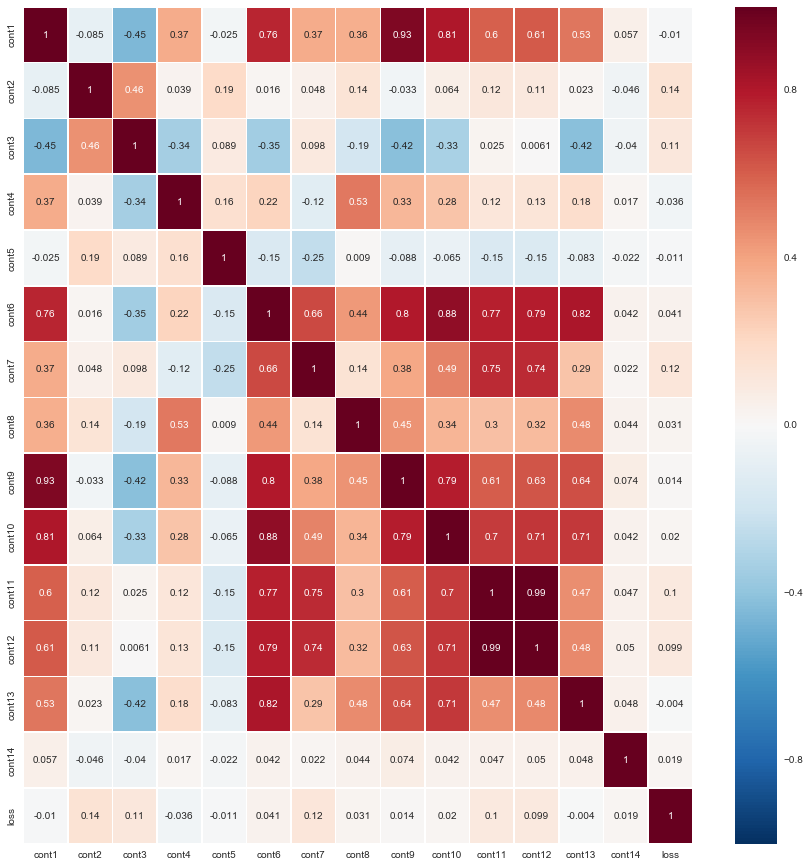

In [89]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(auto_correlations, annot=True, linewidths=.5, ax=ax)

* Possible Multi-collinearity issue: some predictor variables are highly correlated with each other as shown above, but these vars as shown before were not normally distributed
* none of the predictor variables seems correlated with response variable loss

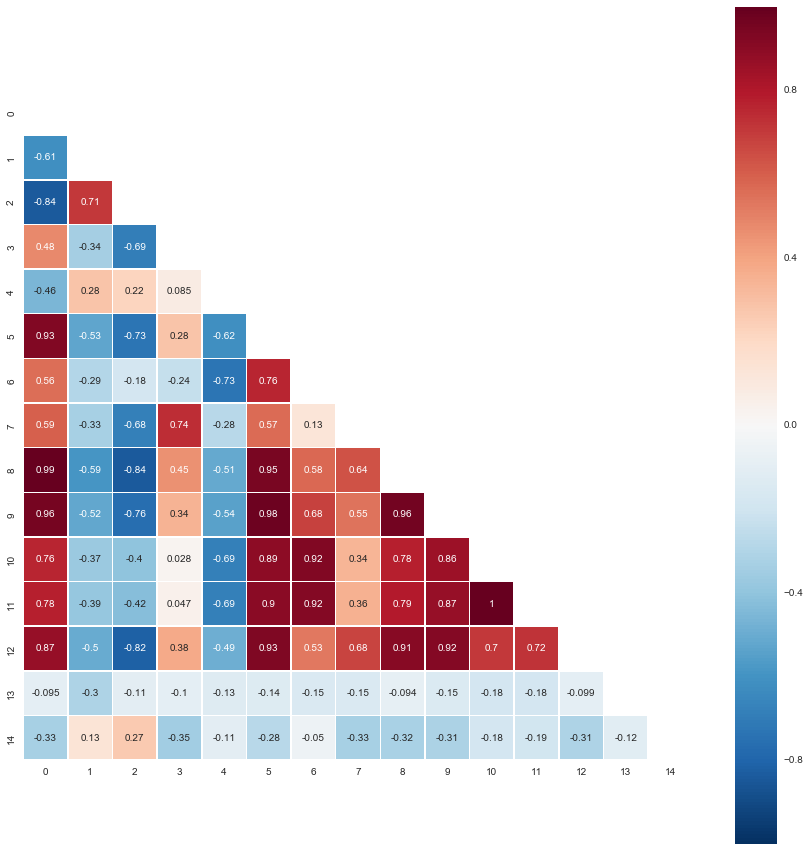

In [92]:
corr = np.corrcoef(auto_correlations)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(corr, mask = mask, square = True,  annot=True, linewidths=.5, ax=ax)


# using transformed response (logLoss)

In [96]:
trainlogLoss = train.iloc[:,117:133] #subset by removing ID and cat vars
trainlogLoss
del trainlogLoss["loss"]

In [97]:
trainlogLoss.head()

cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14   lossLog  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  7.702186  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  7.157424  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  8.008063  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642  6.845720  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  7.924380

In [98]:
auto_correlationslogLoss = trainlogLoss.corr() #continuous vars only
auto_correlationslogLoss

ERROR! Session/line number was not unique in database. History logging moved to new session 15


cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
cont1    1.000000 -0.085180 -0.445431  0.367549 -0.025230  0.758315  0.367384   
cont2   -0.085180  1.000000  0.455861  0.038693  0.191427  0.015864  0.048187   
cont3   -0.445431  0.455861  1.000000 -0.341633  0.089417 -0.349278  0.097516   
cont4    0.367549  0.038693 -0.341633  1.000000  0.163748  0.220932 -0.115064   
cont5   -0.025230  0.191427  0.089417  0.163748  1.000000 -0.149810 -0.249344   
cont6    0.758315  0.015864 -0.349278  0.220932 -0.149810  1.000000  0.658918   
cont7    0.367384  0.048187  0.097516 -0.115064 -0.249344  0.658918  1.000000   
cont8    0.361163  0.137468 -0.185432  0.528740  0.009015  0.437437  0.142042   
cont9    0.929912 -0.032729 -0.417054  0.328961 -0.088202  0.797544  0.384343   
cont10   0.808551  0.063526 -0.325562  0.283294 -0.064967  0.883351  0.492621   
cont11   0.596090  0.116824  0.025271  0.120927 -0.151548  0.773745  0.747108   
cont12   0.614225  0.106250  0.006111  0.130453 -0.148217  0.785144  0.742712   
cont13   0.534850  0.023335 -0.418203  0.179342 -0.082915  0.815091  0.288395   
cont14   0.056688 -0.045584 -0.039592  0.017445 -0.021638  0.042178  0.022286   
lossLog -0.007325  0.104627  0.081518 -0.027521 -0.014962  0.031509  0.085073   

            cont8     cont9    cont10    cont11    cont12    cont13    cont14  \
cont1    0.361163  0.929912  0.808551  0.596090  0.614225  0.534850  0.056688   
cont2    0.137468 -0.032729  0.063526  0.116824  0.106250  0.023335 -0.045584   
cont3   -0.185432 -0.417054 -0.325562  0.025271  0.006111 -0.418203 -0.039592   
cont4    0.528740  0.328961  0.283294  0.120927  0.130453  0.179342  0.017445   
cont5    0.009015 -0.088202 -0.064967 -0.151548 -0.148217 -0.082915 -0.021638   
cont6    0.437437  0.797544  0.883351  0.773745  0.785144  0.815091  0.042178   
cont7    0.142042  0.384343  0.492621  0.747108  0.742712  0.288395  0.022286   
cont8    1.000000  0.452658  0.336588  0.302381  0.315904  0.476402  0.043539   
cont9    0.452658  1.000000  0.785697  0.608000  0.626656  0.642028  0.074154   
cont10   0.336588  0.785697  1.000000  0.702896  0.713812  0.707876  0.041808   
cont11   0.302381  0.608000  0.702896  1.000000  0.994384  0.466247  0.047293   
cont12   0.315904  0.626656  0.713812  0.994384  1.000000  0.478677  0.050267   
cont13   0.476402  0.642028  0.707876  0.466247  0.478677  1.000000  0.047543   
cont14   0.043539  0.074154  0.041808  0.047293  0.050267  0.047543  1.000000   
lossLog  0.032028  0.017422  0.010599  0.072740  0.072246  0.003278  0.025960   

          lossLog  
cont1   -0.007325  
cont2    0.104627  
cont3    0.081518  
cont4   -0.027521  
cont5   -0.014962  
cont6    0.031509  
cont7    0.085073  
cont8    0.032028  
cont9    0.017422  
cont10   0.010599  
cont11   0.072740  
cont12   0.072246  
cont13   0.003278  
cont14   0.025960  
lossLog  1.000000

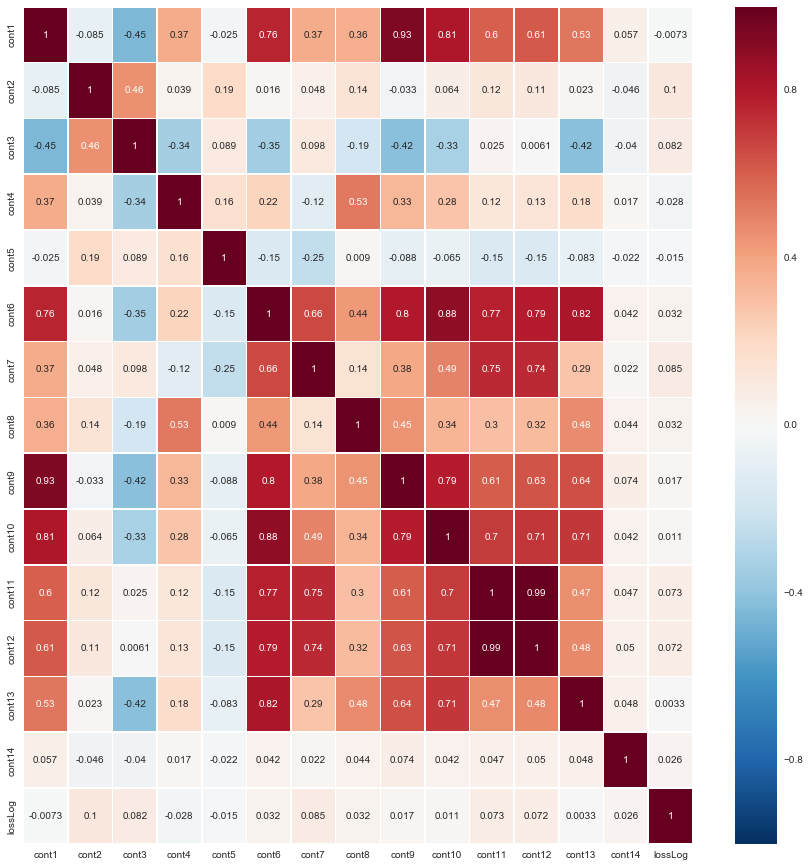

In [99]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(auto_correlationslogLoss, annot=True, linewidths=.5, ax=ax)

# Testing: MLR

In [129]:
#trainCol = list(train.lossLog.columns.values) # list feature names 
trainCol = train.iloc[:,117:133] # all continuous features (excluding response variable: LossLog)

del trainCol["loss"]
trainCol.head(5)

cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0  0.726300  0.245921  0.187583  0.789639  0.310061  0.718367  0.335060   
1  0.330514  0.737068  0.592681  0.614134  0.885834  0.438917  0.436585   
2  0.261841  0.358319  0.484196  0.236924  0.397069  0.289648  0.315545   
3  0.321594  0.555782  0.527991  0.373816  0.422268  0.440945  0.391128   
4  0.273204  0.159990  0.527991  0.473202  0.704268  0.178193  0.247408   

     cont8    cont9   cont10    cont11    cont12    cont13    cont14   lossLog  
0  0.30260  0.67135  0.83510  0.569745  0.594646  0.822493  0.714843  7.702186  
1  0.60087  0.35127  0.43919  0.338312  0.366307  0.611431  0.304496  7.157424  
2  0.27320  0.26076  0.32446  0.381398  0.373424  0.195709  0.774425  8.008063  
3  0.31796  0.32128  0.44467  0.327915  0.321570  0.605077  0.602642  6.845720  
4  0.24564  0.22089  0.21230  0.204687  0.202213  0.246011  0.432606  7.924380

In [130]:
X_mult = trainCol
len(X_mult)

188318

In [119]:
y_mult = train.lossLog
len(y_mult)

188318

In [132]:
X_mult = trainCol
y_mult = train.lossLog

# instantiate and fit 
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult, y_mult)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_

# print the coefficients like last time
print intercept
print coeffs

# pair the feature names with the coefficients
zip (trainCol,multiple_linreg.coef_ )

8.881784197e-15
[ -4.26649657e-17  -4.02455846e-16   2.22044605e-16  -1.11022302e-16
  -4.44089210e-16   1.32446137e-15  -8.03176969e-16  -7.11236625e-17
  -1.14058069e-16  -1.79977561e-16   6.56592836e-16  -3.74266590e-16
   1.08246745e-15  -1.77809156e-16   1.00000000e+00]


[('cont1', -4.2664965691209385e-17),
 ('cont2', -4.0245584642661925e-16),
 ('cont3', 2.2204460492503131e-16),
 ('cont4', -1.1102230246251565e-16),
 ('cont5', -4.4408920985006262e-16),
 ('cont6', 1.3244613739082922e-15),
 ('cont7', -8.0317696937726168e-16),
 ('cont8', -7.1123662515049091e-17),
 ('cont9', -1.1405806854547507e-16),
 ('cont10', -1.7997756063259374e-16),
 ('cont11', 6.5659283565722149e-16),
 ('cont12', -3.7426658994199613e-16),
 ('cont13', 1.0824674490095276e-15),
 ('cont14', -1.7780915628762273e-16),
 ('lossLog', 0.99999999999999867)]

In [133]:
# calculating model R2
y_mult_pred = multiple_linreg.predict(X_mult)
metrics.r2_score(y_mult, y_mult_pred)

1.0